# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.svm import SVC
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to check if a dataset is shattered
def is_shattered(dimension, num_samples, samples, visualize=False):
    samples = np.array(samples)
    class_combinations = list(product([0, 1], repeat=num_samples))
    unique_classes = []

    for c in class_combinations:
        c_reversed = [0 if x == 1 else 1 for x in c]
        if c_reversed not in unique_classes and c not in unique_classes:
            unique_classes.append(c)

    is_shattered = True
    for y in np.array(unique_classes):
        separable = True
        if sum(y) == 0 or sum(y) == num_samples:
            continue
        svm = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svm.fit(samples, y)
        if svm.score(samples, y) != 1.0:
            separable = False
            is_shattered = False
        if visualize and dimension == 2:
            plot_decision_boundary(samples, y, svm, separable)

    return is_shattered

def plot_decision_boundary(samples, labels, svm, separable=True):
    plt.scatter(samples[labels == 0, 0], samples[labels == 0, 1], c='orange', label='Class 0')
    plt.scatter(samples[labels == 1, 0], samples[labels == 1, 1], c='green', label='Class 1')
    
    xlim = (np.min(samples[:, 0]) - 0.1, np.max(samples[:, 0]) + 0.1)
    ylim = (np.min(samples[:, 1]) - 0.1, np.max(samples[:, 1]) + 0.1)
    
    x_values = np.linspace(xlim[0], xlim[1], 100)
    y_values = np.linspace(ylim[0], ylim[1], 100)
    xx, yy = np.meshgrid(x_values, y_values)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svm.decision_function(xy).reshape(xx.shape)
    
    if separable:
        plt.contour(xx, yy, Z, colors='black', levels=[0], linestyles=['-'])
    plt.title(f'Linear separability: {separable}')
    plt.legend()
    plt.grid()
    plt.show()


In [36]:
ex1 = is_shattered(2, 3, [[0, 0], [1, 1], [2, 2]])
ex2 = is_shattered(2, 3, [[0, 0], [1, 1], [1, 0]])

print(f'Example 1: {ex1}')
print(f'Example 2: {ex2}')

Example 1: False
Example 2: True


In [19]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

### c)

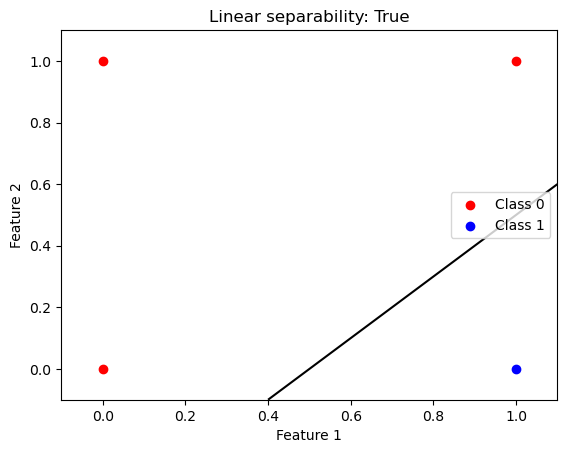

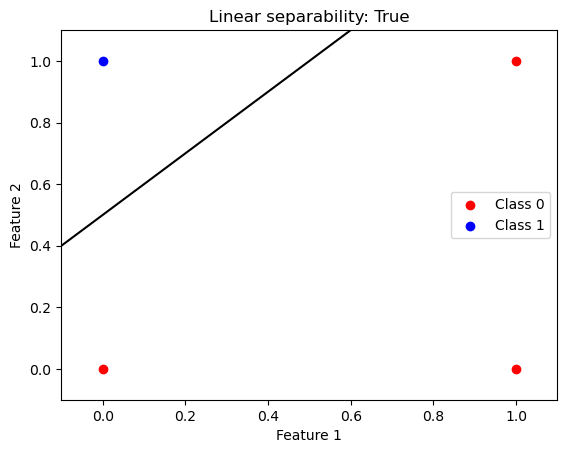

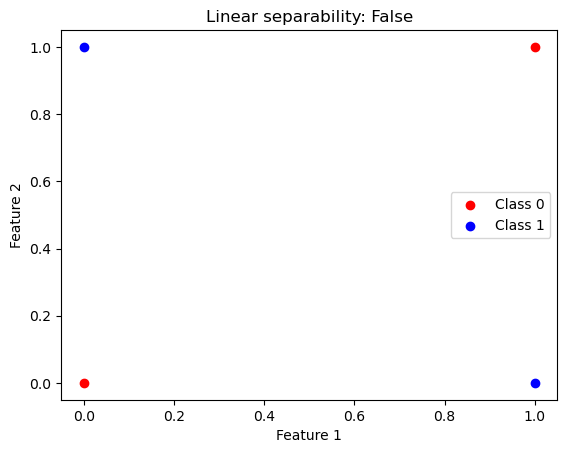

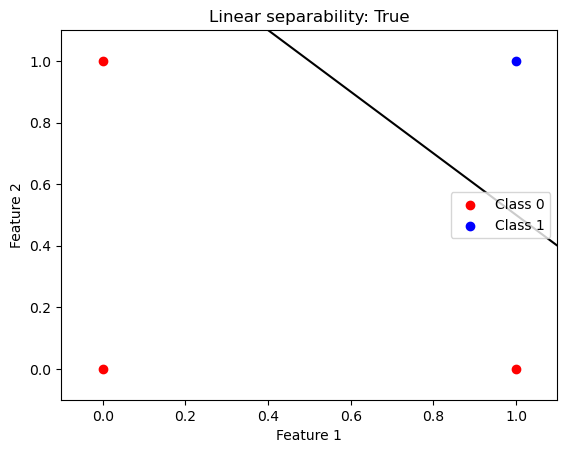

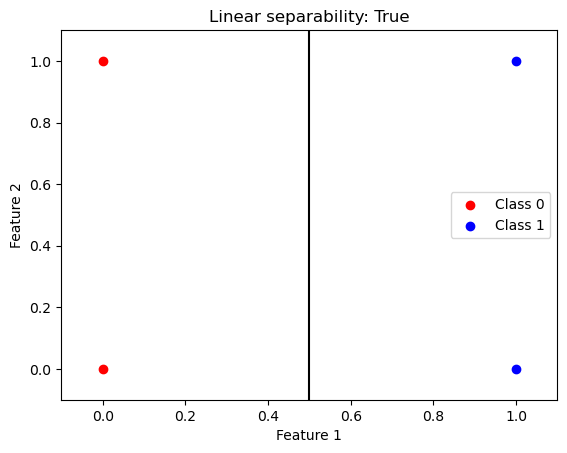

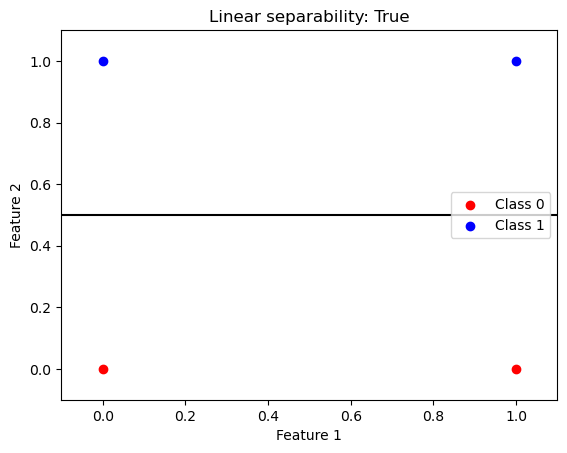

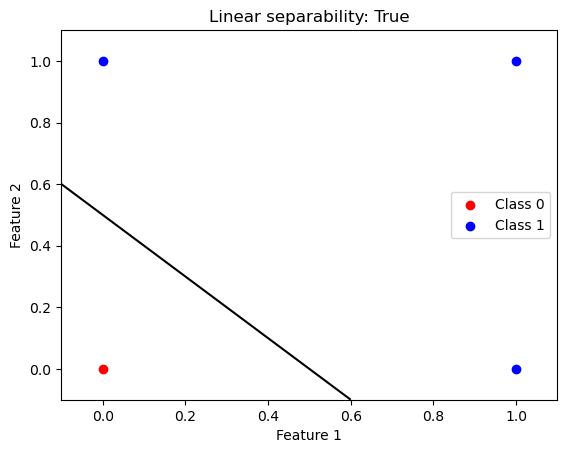

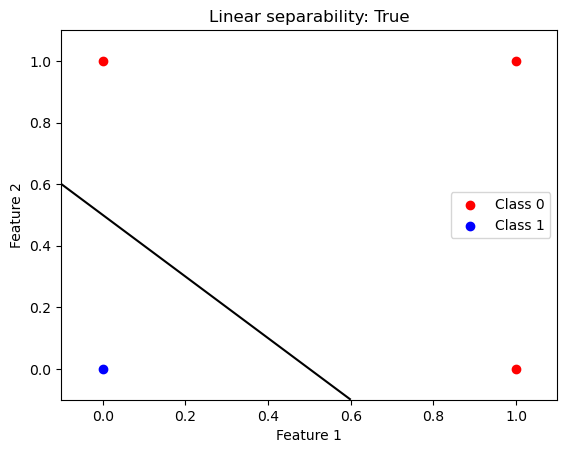

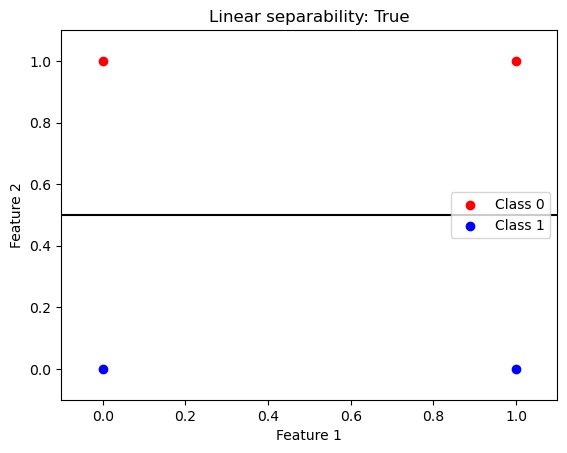

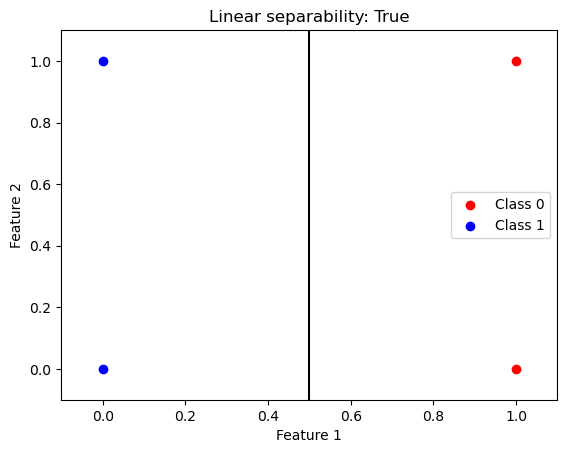

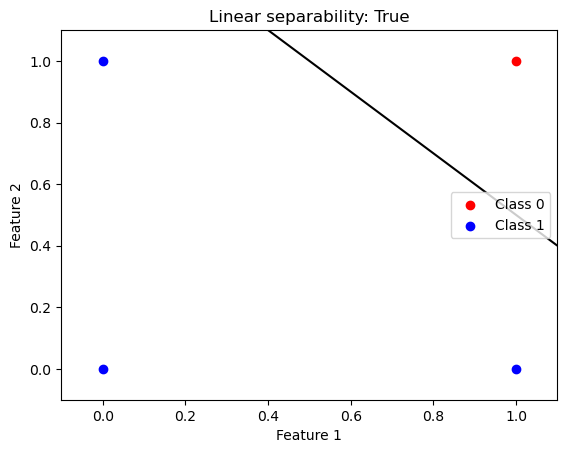

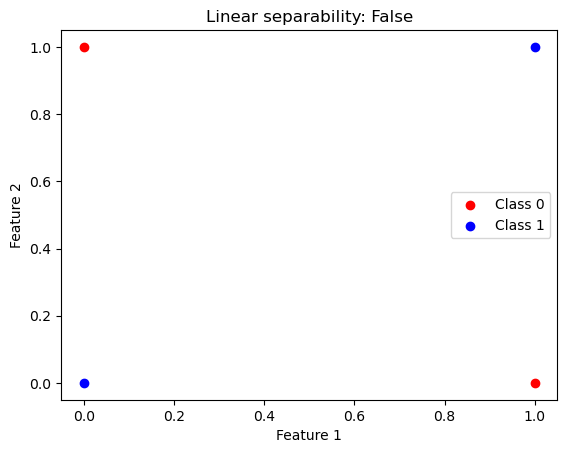

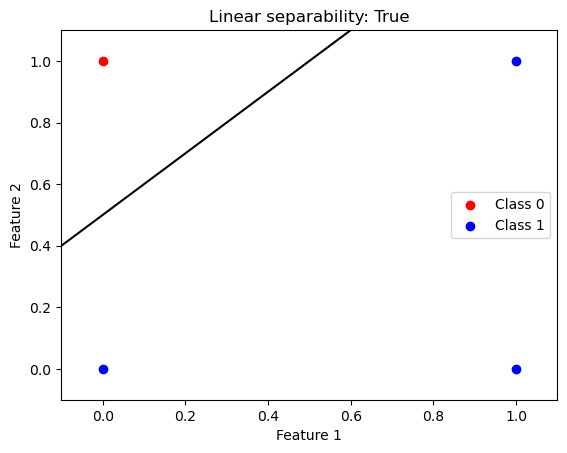

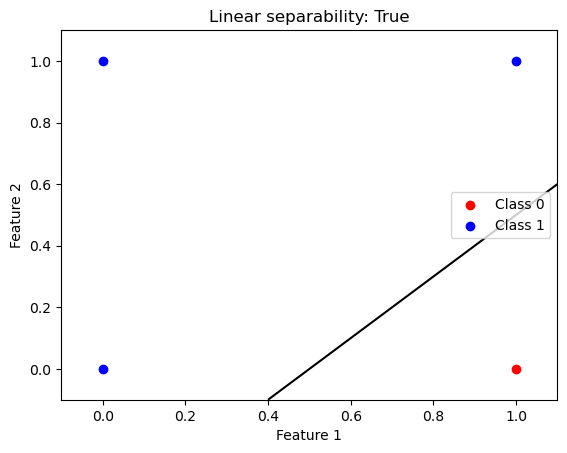

False

In [20]:
is_shattered(2, 4, [[0, 0], [1, 1], [0, 1], [1, 0]],visualize=True)

### d)

In [29]:

ns = []
dims = list(range(2,10))
for d in dims:
    n=0
    shattered = True
    while shattered:
        n+=1
        was_shattered = False
        for i in range(50):
            sample = np.random.normal(size=(n, d))
            was_shattered = is_shattered(d, n, sample)
            if was_shattered:
                break
        shattered = was_shattered
    ns.append(n)

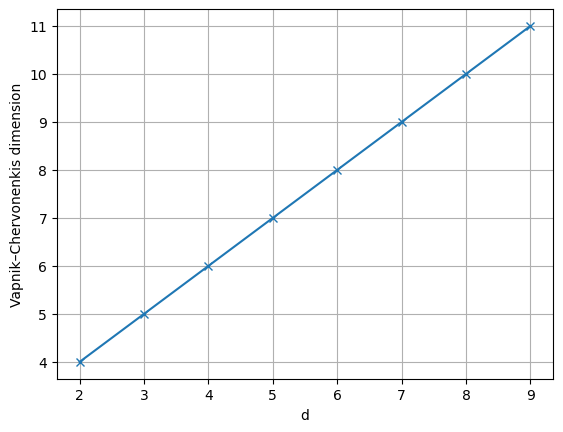

In [35]:
plt.plot(dims, ns, '-x')
plt.xlabel('d')
plt.ylabel('Vapnik–Chervonenkis dimension')
plt.grid()
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM